In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dft=pd.read_csv('/content/drive/My Drive/IBM_sentiment_analysis/data/cleaned_vader_labelled_5days_partition/feb_26-29.csv')


In [ ]:
df=dft
print(df.shape)
df.isnull().sum()
df.head()

(33017, 7)


,date,id,text,hashtags,retweet_count,location,cleaned
0,2020-02-29,1233542673149022209,More coronavirus cases in the US. #COVID2019 h...,['COVID2019'],0.0,{'country_code': 'in'},coronavirus cases us covid
1,2020-02-29,1233542688865243148,Please tell me this is not real https://t.co/q...,[],1510.0,"{'country_code': 'in', 'state': 'West Bengal'...",please tell real
2,2020-02-29,1233610631682478081,Islamophobia is a 🌍 global phenomenon: \n\n🇮🇳 ...,"['Delhi', 'India']",572.0,{'country_code': 'in'},islamophobia global phenomenon india delhi rio...
3,2020-02-29,1233616121699368961,Look at the smile on his face 😂\n\nWhen #chick...,"['chicken', 'Coronavirus', 'chickenislove']",0.0,{'country_code': 'in'},look smile face chicken love telangana ministe...
4,2020-02-29,1233617546747817984,How stock market really works\n\n#CoronavirusO...,['CoronavirusOutbreak'],7.0,{'country_code': 'in'},stock market really works coronavirusoutbreak


In [ ]:
df.tail()

,date,id,text,hashtags,retweet_count,location,cleaned
33012,2020-02-29,1233859663084474368,Hold on a minute... #coronavirus \n\nThere are...,['coronavirus'],1.0,"{'country_code': 'in', 'state': 'Delhi'}",hold minute coronavirus diseases hidden ice wa...
33013,2020-02-29,1233643711986167808,Trump says the democrats are politicizing the ...,[],1338.0,"{'country_code': 'in', 'state': 'Maharashtra'...",trump says democrats politicizing coronavirus ...
33014,2020-02-29,1233679770304512000,"@AriaSaki Coronavirus isn't that severe, it's ...",[],0.0,"{'country_code': 'in', 'state': 'Uttar Prades...",coronavirus severe another flu problem develop...
33015,2020-02-29,1233741987163131911,⁦@safiranand⁩ #Coronavirus update.. #Coronavir...,"['Coronavirus', 'CoronavirusOutbreak']",0.0,"{'country_code': 'in', 'state': 'West Bengal'...",coronavirus update coronavirusoutbreak chinese...
33016,2020-02-29,1233729377864704000,*#CoronaVirus* will be \nhistory after few mon...,"['CoronaVirus', 'KaroNa', 'MutualFunds', 'Stoc...",1.0,"{'country_code': 'in', 'state': 'West Bengal'...",coronavirus history month time karona investme...


In [ ]:
print(df.shape)
df.isnull().sum()

(33017, 7)


date             0
id               0
text             0
hashtags         0
retweet_count    0
location         0
cleaned          0
dtype: int64

In [ ]:
!pip install -U pywsd

Requirement already up-to-date: pywsd in /usr/local/lib/python3.6/dist-packages (1.2.4)


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
text_clean=df['cleaned']

In [ ]:
text_clean=text_clean.str.replace('?','')
text_clean=text_clean.str.replace('!','')

In [ ]:
text_clean[:5]

0                           coronavirus cases us covid
1                                     please tell real
2    islamophobia global phenomenon india delhi rio...
3    look smile face chicken love telangana ministe...
4        stock market really works coronavirusoutbreak
Name: cleaned, dtype: object

In [ ]:
print(len(text_clean))
text_clean[0]

33017


'coronavirus cases us covid'

In [ ]:
from pywsd.utils import lemmatize_sentence
t_clean=[lemmatize_sentence(s) for s in text_clean]

Warming up PyWSD (takes ~10 secs)... took 5.636178255081177 secs.


In [ ]:
t_clean[0]

['coronavirus', 'case', 'u', 'covid']

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
from itertools import chain
words=list(chain.from_iterable(t_clean))


In [ ]:
print(words[0])

coronavirus


In [ ]:
string=' '.join(words)

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10,stopwords=['corona','coronavirus','virus','coronavirusoutbreak','covid','viru','coronaviru','novel']).generate(string)

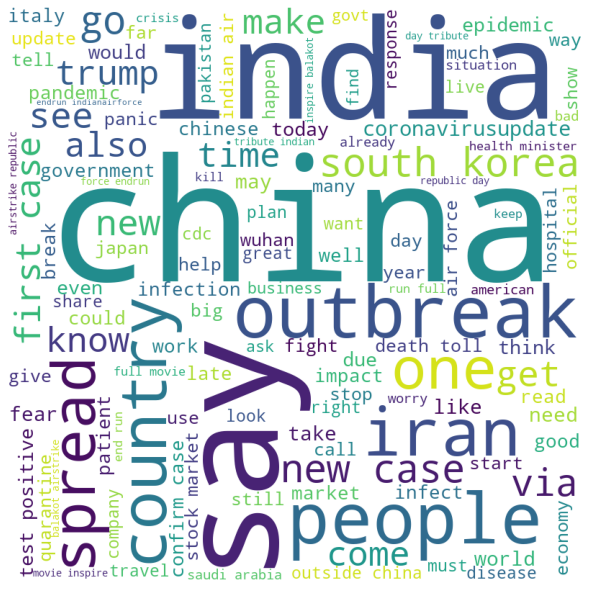

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
f_clean=[]
for l in t_clean:
  s=' '.join(l)
  f_clean.append(s)

In [ ]:
f_clean[:5]

['coronavirus case u covid',
 'please tell real',
 'islamophobia global phenomenon india delhi riot leave dead mosque destroy germany anti muslim bigot kill people china coronavirus protection muslim prison camp kashmir india siege continue th month',
 'look smile face chicken love telangana minister kt rama rao etela rajender talasani other eat chicken stage hyderabad yesterday bid end rumour coronavirus transmit chicken egg chickenislove',
 'stock market really work coronavirusoutbreak']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, ngram_range=(2,3),stop_words=['corona','coronavirus','virus','coronavirusoutbreak','covid','viru','coronaviru','novel'])
tf = tf_vectorizer.fit_transform(f_clean)
tf_feature_names = tf_vectorizer.get_feature_names()

In [ ]:
tf_feature_names

['across country',
 'across europe',
 'across globe',
 'across world',
 'additional case',
 'affect country',
 'affect many',
 'affect many case',
 'affect outbreak',
 'agency monitor',
 'agency monitor spread',
 'ai iot',
 'aid etc',
 'aid etc saint',
 'air force',
 'air force endrun',
 'air india',
 'air india flight',
 'airstrike republic',
 'airstrike republic day',
 'ambassador vatican',
 'american people',
 'american prepare',
 'amid concern',
 'amid fear',
 'amid outbreak',
 'app store',
 'arabia ban',
 'arabia halt',
 'arabia suspend',
 'arabia suspend entry',
 'arabia temporarily',
 'around globe',
 'around world',
 'assessment high',
 'austria croatia',
 'authority say',
 'back indians',
 'bad news',
 'bad week',
 'bad week since',
 'balakot airstrike',
 'balakot airstrike republic',
 'balakotairstrike wednesdaythoughts',
 'balakotairstrike wednesdaythoughts ajitdoval',
 'ban ad',
 'bbc news',
 'become pandemic',
 'behind closed',
 'behind closed door',
 'best way',
 'bill ga

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [ ]:
def display_topics(model, feature_names, no_top_words):
  s=''
  for topic_idx, topic in enumerate(model.components_):
    s=s+("Topic %d:" % (topic_idx))
    s=s+(",".join([feature_names[i]
                    for i in topic.argsort()[:-no_top_words - 1:-1]]))
    s=s+'\n'
  return s

no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

'Topic 0:confirm case,global market,people die,middle east,mainland china,new york,health authority,outbreak china,number confirm,global spread\nTopic 1:saudi arabia,due outbreak,south korea,iran italy,italy iran,trump administration,saudi arabia suspend,arabia suspend,suspend entry,case country\nTopic 2:report first,amid outbreak,first case,report first case,tokyo olympics,wash hand,china report,donate million,global pandemic,decisive point\nTopic 3:test positive,health minister,cruise ship,public health,hong kong,deputy health,deputy health minister,case death,president trump,trump say\nTopic 4:first case,death toll,stock market,confirms first,case confirm,confirms first case,confirm first,toll rise,confirm first case,death toll rise\nTopic 5:new case,air force,indian air,indian air force,outside china,south korea,report new,report new case,supply chain,korea report\nTopic 6:south korea,hit wuhan,diamond princess,report case,evacuate hit,two case,total number,evacuate hit wuhan,jalas

In [ ]:
lda.perplexity(tf)

391.12735690745217

In [ ]:
f=open('lda_feb_26-29.pk','wb')
import pickle
pickle.dump(lda, f)
f.close()

In [ ]:
f = open("topics_feb_26-29.txt", "w")
f.write(display_topics(lda, tf_feature_names, no_top_words))
f.close()

In [ ]:
import shutil
shutil.move('lda_feb_26-29.pk','/content/drive/My Drive/IBM_sentiment_analysis/topic_modelling/saved_models/lda_feb_26-29.pk')
shutil.move("topics_feb_26-29.txt",'/content/drive/My Drive/IBM_sentiment_analysis/topic_modelling/topics_text_files/topics_feb_26-29.txt')